<a href="https://colab.research.google.com/github/RichaSingh1/Projects/blob/main/NetflixProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###1. Defining Problem Statement and Analysing basic metrics 
Problem Statement = Analysis of Netflix data set and deriving insights from it.
Fields focused in this analysis (Direction) = Showtype, actor and country

In [ ]:
##Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
##Importing Dataset
!gdown 1Qs_QlhuROGHD4hlo6q1LidaMV5LUuwRu

df = pd.read_csv("NetflixData.csv")

Downloading...
From: https://drive.google.com/uc?id=1Qs_QlhuROGHD4hlo6q1LidaMV5LUuwRu
To: /content/NetflixData.csv
100% 3.40M/3.40M [00:00<00:00, 73.9MB/s]


###2. Observations on the shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary

In [ ]:
df.info() ##Field information on the dataframe - data type and not-null count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


Data has 12 columns for the shows it has released over the years. There is no user facing data regarding if the user has seen, not seen, liked or not liked the shows.
Above shows the data type of each column and Non-null count of each column (entries where data is present).

In [ ]:
df.head(3) ##Check the top 3 rows of dataframe

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


It can be observed that data has multiple nested columns and missing values (NaN values)

In [ ]:
df.shape ##Checking dimensions of the dataframe

(8807, 12)

Data has 8807 rows/entries and 12 columns/fields

In [ ]:
df.describe(include="object") ##Checking statistics for each field

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


In [ ]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

We can observe number of entries with no data present (NaN value) for each field

###3. Data Processing

In [ ]:
##Unnesting based on Showtype(listed_in field)
type_df = pd.DataFrame(df.listed_in.str.split(', ').tolist(), index=df.show_id).stack().rename('ShowType').reset_index([0, 'show_id']) 
df2=df.drop('listed_in', axis=1).merge(type_df)

In [ ]:
##Unnesting based on cast(cast field)
df3=df2.drop('cast', axis=1).join(df2['cast'].str.split(', ', expand=True).stack(dropna=False).reset_index(level=1, drop=True).rename('cast'))

In [ ]:
##Unnesting based on country(country field)
temp_df=df.drop('country', axis=1).join(df['country'].str.split(', ', expand=True).stack(dropna=False).reset_index(level=1, drop=True).rename('country'))
#temp_df['country'].sort_values(ascending=False)

In [ ]:
##Merging all for final data for analysis
final_df=df3.drop('country', axis=1).merge(temp_df.drop('cast', axis=1),how='right')
final_df=final_df.drop('listed_in', axis=1)
final_df.head(5)

,show_id,type,title,director,date_added,release_year,rating,duration,description,ShowType,cast,country
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm...",Documentaries,NaN,United States
1,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm...",Documentaries,NaN,United States
2,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm...",Documentaries,NaN,United States
3,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm...",Documentaries,NaN,United States
4,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm...",Documentaries,NaN,United States


Un nested and stacked data for cast, country and showtype (listed_in field)

In [ ]:
##Adding more date, year and month fields from date added(date_added field)
final_df['date_add_convert'] = pd.to_datetime(final_df['date_added'])
final_df['year'] = pd.DatetimeIndex(final_df['date_add_convert']).year.astype('Int64')
final_df['month'] = pd.DatetimeIndex(final_df['date_add_convert']).month.astype('Int64')
final_df['dayofweek'] = pd.DatetimeIndex(final_df['date_add_convert']).dayofweek.astype('Int64')
final_df.head(2)

,show_id,type,title,director,date_added,release_year,rating,duration,description,ShowType,cast,country,date_add_convert,year,month,dayofweek
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm...",Documentaries,NaN,United States,2021-09-25,2021,9,5
1,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm...",Documentaries,NaN,United States,2021-09-25,2021,9,5


In [ ]:
##Removing duplicates
final_df=final_df.drop_duplicates()
final_df.head(2)

,show_id,type,title,director,date_added,release_year,rating,duration,description,ShowType,cast,country,date_add_convert,year,month,dayofweek
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm...",Documentaries,NaN,United States,2021-09-25,2021,9,5
50,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm...",Documentaries,NaN,None,2021-09-25,2021,9,5


###4. Non-Graphical Analysis: Value counts and unique attributes

Assumption = Given is the total data from the company, there is no data prior or after the time period of the shared data

In [ ]:
df['type'].value_counts(dropna=False) ##Frequency of each value "Type" column including null values

Movie      6131
TV Show    2676
Name: type, dtype: int64

There are total 6131 movies and 2676 TV shows made by the company in the total time period of shared data

In [ ]:
#final_df['cast'].describe()
final_df['cast'].value_counts(dropna=False)

NaN                 41343
Anupam Kher           247
Shah Rukh Khan        206
Naseeruddin Shah      186
Akshay Kumar          173
                    ...  
Drew Davis              1
Matt McCooey            1
Joe Swash               1
Siu-See Hung            1
Tom Wyner               1
Name: cast, Length: 36440, dtype: int64

There are total 36439 (+1 NaN) unique cast in all the shows.

In [ ]:
final_df['ShowType'].describe(include=object)

count     362974
unique        42
top       Dramas
freq       53121
Name: ShowType, dtype: object

There are total 42 unique show types.

In [ ]:
final_df['country'].value_counts(dropna=False)

NaN               167321
United States      60383
India              23870
United Kingdom     13973
Japan               8655
                   ...  
Samoa                  2
Botswana               1
Uganda                 1
United States,         1
Kazakhstan             1
Name: country, Length: 128, dtype: int64

There are total 127 (+1 NaN) unique countries where shows are released by the company.

In [ ]:
df['show_id'].describe(include=object) ##unique=8807, total=8807 ##Raw data

count     8807
unique    8807
top         s1
freq         1
Name: show_id, dtype: object

In [ ]:
final_df['show_id'].describe(include=object) ##unique=8807, total=362974 ##Unnested data

count     362974
unique      8807
top        s5306
freq         516
Name: show_id, dtype: object

#####General Analysis for one scenario

In [ ]:
temp=final_df[['show_id','country','year']]
temp=temp.drop_duplicates()

df_agg = temp.groupby("country")[["year", "show_id"]].aggregate({"year": ["min", "max"], "show_id":"count"})

In [ ]:
df_agg.columns = ["_".join(col) for col in df_agg.columns]
df_agg.reset_index(inplace=True)

In [ ]:
df_agg["Serviceyrs"] = df_agg["year_max"] - df_agg["year_min"]+1
df_agg.drop_duplicates()

,country,year_min,year_max,show_id_count,Serviceyrs
0,,2021,2021,2,1
1,Afghanistan,2017,2017,1,1
2,Albania,2018,2018,1,1
3,Algeria,2020,2021,3,2
4,Angola,2020,2020,1,1
...,...,...,...,...,...
122,Vatican City,2019,2019,1,1
123,Venezuela,2017,2021,4,5
124,Vietnam,2017,2021,7,5
125,West Germany,2017,2020,5,4


In [ ]:
df_agg["movie_per_yr"] = df_agg["show_id_count"] / df_agg["Serviceyrs"]
df_agg.sort_values("movie_per_yr", ascending=False).head(5) ##Taking top 5 rows

,country,year_min,year_max,show_id_count,Serviceyrs,movie_per_yr
119,United States,2008,2021,3689,14,263.500000
47,India,2016,2021,1046,6,174.333333
117,United Kingdom,2011,2021,804,11,73.090909
22,Canada,2013,2021,445,9,49.444444
55,Japan,2015,2021,318,7,45.428571


Above tells that the company has released -
1. Total 3689 shows in United States with movie_per_year=263.5 during 2008 to 2021
2. Total 1046 shows in India with movie_per_year=174.33 during 2016 to 2021
3. Total 804 shows in United Kingdom with movie_per_year=73.09 during 2011 to 2021

It can be observed that the company releases the shows in United States, India and United Kingdom with movie per year rate of more than 50.

###5. Visual Analysis - Univariate, Bivariate after pre-processing of the data

####Univariate Analysis - One Variable analysis

#####Q1. No of Movies released per year (General analysis) through a histogram plot

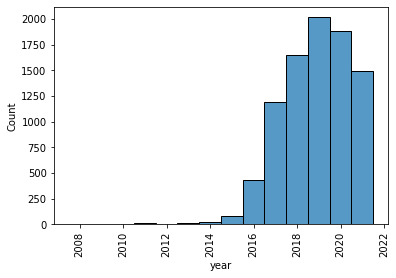

In [ ]:
##Q1. No of Movies released per (General) ##Histogram

temp=final_df[['show_id', 'year']]
temp=temp.drop_duplicates()
sns.histplot(x="year", data=temp)
plt.xticks(rotation = 90)
plt.show()

It can be observed that the company is releasing more shows from 2014-15 as compared to earlier years

#####Analysis of Viewer rating for the shows through countplot

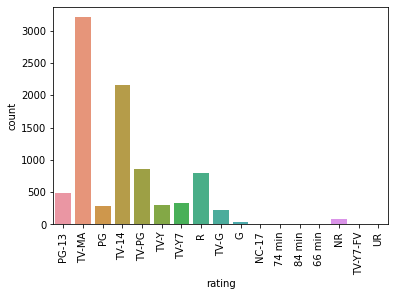

In [ ]:
##Countplot

temp=final_df[['show_id', 'rating']]
temp=temp.drop_duplicates()
sns.countplot(data = temp , x = 'rating');
plt.xticks(rotation = 90);
plt.show()

It can be observed that the company releases more 'TV-MA' and 'TV-14' rated shows as compared to other ratings.
It can also be observed that data=74 min, 84 min and 66 min are outliers in this data and doesn't belongs to the category of Viewer-rating

#####Q2. Comparison of Movies and Shows through a countplot

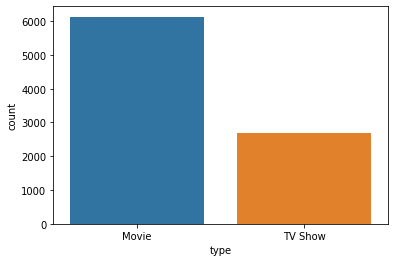

In [ ]:
##Q2. Comparison of Movies and Shows
Typeperyear=final_df[['show_id', 'type']]
Typeperyear=Typeperyear.drop_duplicates()

sns.countplot(x="type", data=Typeperyear)
plt.show()

It can be observed that the company releases more movies than it releases TV shows.

####Bivariate Analysis/Multi-variate analysis

######Q1. No of Movies released per year (Type wise) / Q5. Does Netflix has more focus on TV Shows than movies in recent year

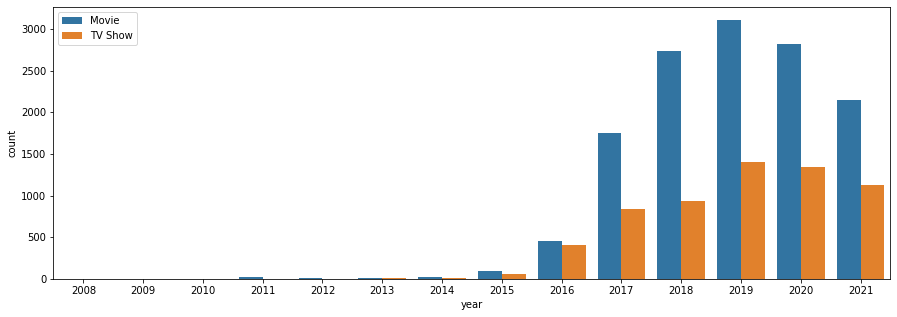

In [ ]:
##Q1. No of Movies released per year (Type wise)/Q5. Does Netflix has more focus on TV Shows than movies in recent years

temp=final_df[['year','type','ShowType','show_id']]
temp=temp.drop_duplicates()

ShowPerYear=temp.groupby(by=['type','year'])['ShowType'].count().to_frame()
ShowPerYear.columns = ['count']
ShowPerYear = ShowPerYear.sort_values(by=['count','year'] ,  ascending = False).head(25).reset_index() #Taken Top 25 values


plt.figure(figsize = [15,5])
sns.barplot(x='year', y='count', hue='type', data=ShowPerYear)
plt.legend( loc="upper left",ncol=1)
plt.show()

Above plot shows the distribution of movies and shows between 2008 and 2021 and below can be observed:
1. Company focuses more on Movies than TV shows in recent years
2. Company has released most no of Movies and TV shows in 2019
3. Company has released **almost** equal no of Movies and TV shows in 2016

######Show-type analysis over the years

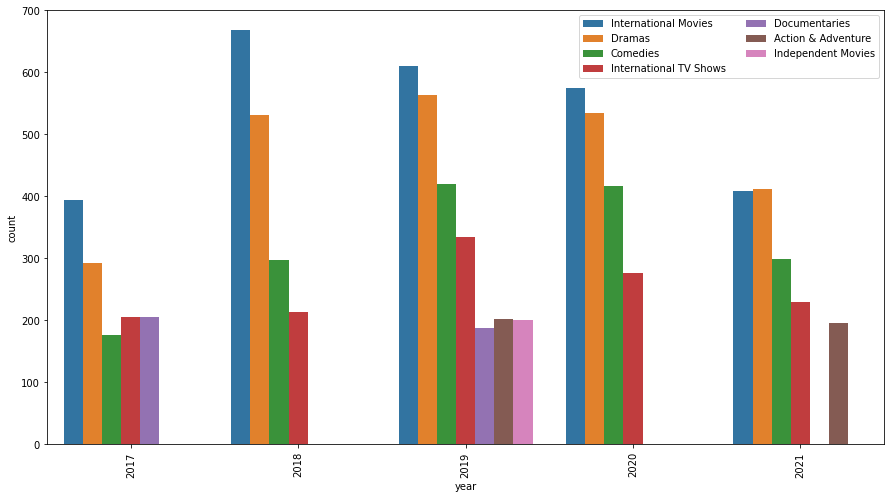

In [ ]:
temp=final_df[['year','ShowType','show_id']]
temp=temp.drop_duplicates()

ShowOverYear=temp.groupby(by=['year','ShowType'])['show_id'].count().to_frame()#.sort_values(by=['count','year'] ,  ascending = False)
ShowOverYear.columns = ['count']
ShowOverYear = ShowOverYear.sort_values(by=['count','year','ShowType'] ,  ascending = False).head(25).reset_index()

plt.figure(figsize = [15,8])
sns.barplot(x='year', y='count', hue='ShowType', data=ShowOverYear, estimator=np.mean)
plt.xticks(rotation = 90)
plt.legend( loc="upper right",ncol=2)
plt.show()

Below can be observed for the above plot:
1. Company is focusing more on **International Movies, Dramas, Comedies and International TV Shows** over the last 5 years
2. Company has released **Documentaries** in 2017 and 2019 and not in other years
3. Company has released **Action & Adventure** in 2019 and 2021 and not in other years
4. Company has released **Independent Movies** in 2019 and not in other years


#####Q3. What is the best time to launch a TV show?

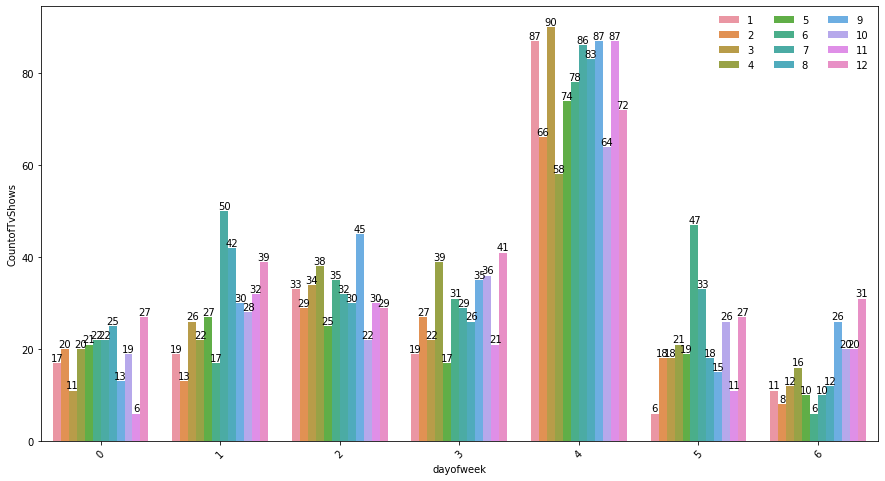

In [ ]:
##Q3. What is the best time to launch a TV show?
temp=final_df[['show_id','type','month','dayofweek']]
temp=temp.drop_duplicates()

besttimeforShows=temp[temp['type'] == "TV Show"].groupby(by=['type','month','dayofweek'])['show_id'].count().to_frame()
besttimeforShows.columns = ['count']
besttimeforShows = besttimeforShows.sort_values(by=['count','month','dayofweek'] ,  ascending = False).reset_index()

plt.figure(figsize = [15,8]);
x=sns.barplot(x='dayofweek', y='count',hue='month', data=besttimeforShows)
plt.legend( loc="upper right", ncol=3, frameon = False)
plt.xticks(rotation = 45)
plt.ylabel("CountofTvShows") 
for p in x.patches: ##Setting data labels
             x.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')
plt.show()

Below can be observed for the above plot:

1. Company is releasing more TV shows on **4th day of the week** i.e., on **Fridays** and least number on **6th day of the week** i.e., on **Sundays**
(Week starts on Monday,so Monday=0, Friday=4 and Sunday=6)
2. Company is releasing more TV shows on **12th month of the year** i.e., in **December**
(Year starts on January, Januray=0 and December=12)
3. Company is also focusing to release more TV shows in **7th and 9th month of the year** i.e., in **January, July, September and November**



#####Q4. Analysis of actors/directors of different types of shows/movies

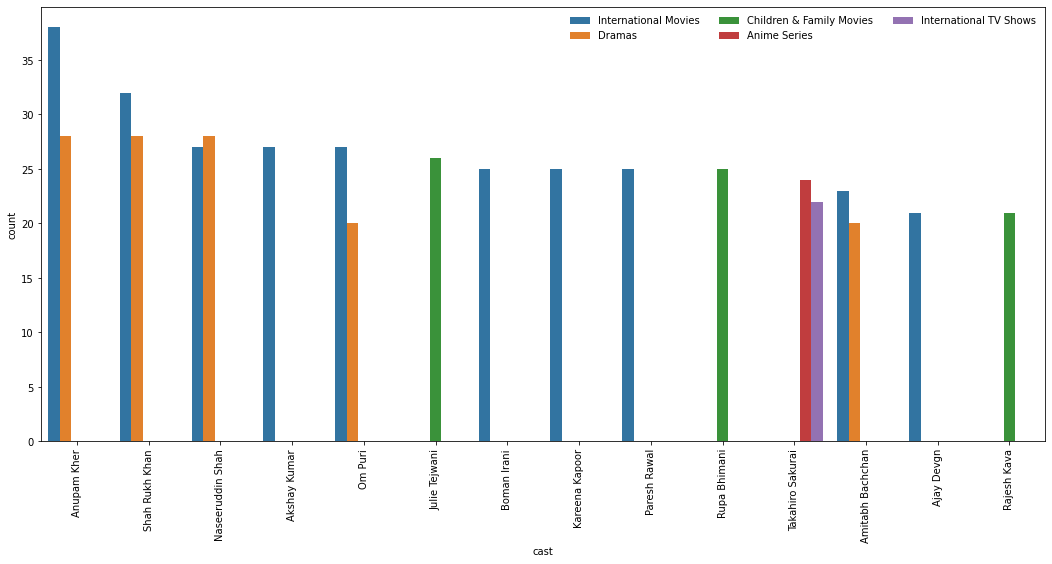

In [ ]:
##Q4. Analysis of actors/directors of different types of shows/movies
temp=final_df[['ShowType','cast','show_id']]
temp=temp.drop_duplicates()

castfortype=temp.groupby(by=['cast','ShowType'])['show_id'].count().to_frame()
castfortype.columns = ['count']
castfortype = castfortype.sort_values(by=['count','ShowType'] ,  ascending = False).head(20).reset_index()
#castforyear.describe
plt.figure(figsize = [18,8]);
sns.barplot(x='cast', y='count', hue='ShowType', data=castfortype)
plt.legend( loc="upper right", ncol=3, frameon = False)
plt.xticks(rotation = 90)
plt.show()

Below can be observed for the above plot:
1. For International Movies, most favoured casts are Anupam Kher and Shahrukh Khan
2. For Dramas, most favoured casts are Anupam Kher, Shahrukh Khan and Naseeruddin Shah
3. For Children & Family Movies, most favoured casts are Julie Tejwani and Rupa Bhimani
4. For International TV Shows, most favoured cast is Takahiro Sakurai
5. For Anime series, most favoured cast is Takahiro Sakurai

#####Q6. Understanding what content is available in different countries

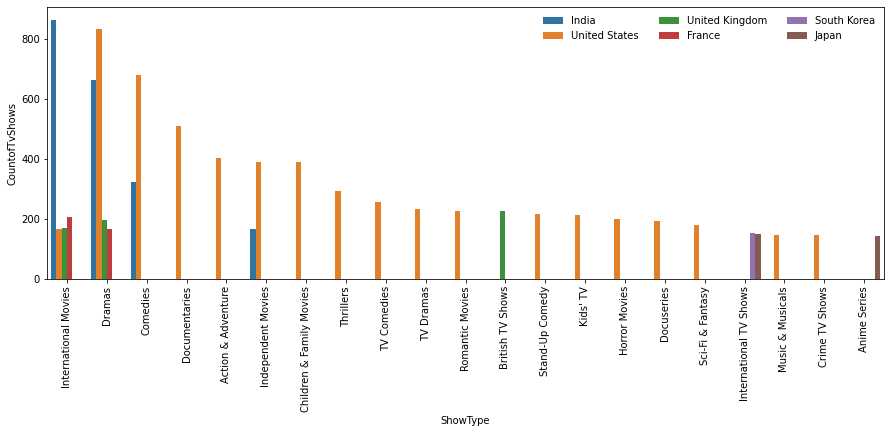

In [ ]:
##Q6. Understanding what content is available in different countries
temp=final_df[['show_id','ShowType','country']]
temp=temp.drop_duplicates()

ShowsInCountry=temp.groupby(by=['country','ShowType'])['ShowType'].count().to_frame()
ShowsInCountry.columns = ['count']
ShowsInCountry = ShowsInCountry.sort_values(by=['count','ShowType'] ,  ascending = False).head(30).reset_index()

plt.figure(figsize = [15,5]);
sns.barplot(x='ShowType', y='count', hue='country', data=ShowsInCountry)
plt.legend( loc="upper right", ncol=3, frameon = False)
plt.xticks(rotation = 90)
plt.ylabel("CountofTvShows")
plt.show()

Below can be observed for the above plot:

1. In India, most released content is for International Movies, Dramas, Comedies and Independent Movies
2. British TV Shows are favoured only in United Kingdom
3. In Japan, International TV Shows and  Anime Series are mostly released
4. In South Korea, Internal TV Shows are mostly released

####Co-relation and Scatter Plot

In [ ]:
df_agg.head(3)

,country,year_min,year_max,show_id_count,Serviceyrs,movie_per_yr
0,,2021,2021,2,1,2.0
1,Afghanistan,2017,2017,1,1,1.0
2,Albania,2018,2018,1,1,1.0


In [ ]:
df_agg.corr()

,year_min,year_max,show_id_count,Serviceyrs,movie_per_yr
year_min,1.000000,-0.076922,-0.469385,-0.826311,-0.457788
year_max,-0.076922,1.000000,0.149895,0.625106,0.193294
show_id_count,-0.469385,0.149895,1.000000,0.452136,0.949869
Serviceyrs,-0.826311,0.625106,0.452136,1.000000,0.467573
movie_per_yr,-0.457788,0.193294,0.949869,0.467573,1.000000


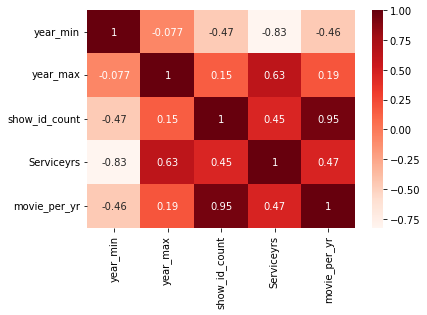

In [ ]:
sns.heatmap(df_agg.corr(), cmap="Reds", annot=True)
plt.show()

Below can be observed from the above plot:
Serviceyrs (Number of years the company has been releasing shows in a country) is positively co-related with movie_per_yr

###6. Missing Value & Outlier check (Treatment optional)

In [ ]:
df.isnull().sum() ##Null Values

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

It can be observed that "director" field has most number of null entries followed by cast and country.

In [ ]:
mis_val_per = df.isnull().sum()/len(df)*100 ##Percenatge of missing value for each column
mis_val_per

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

Above analysis shows that around 30% of data for director field has no value/null value

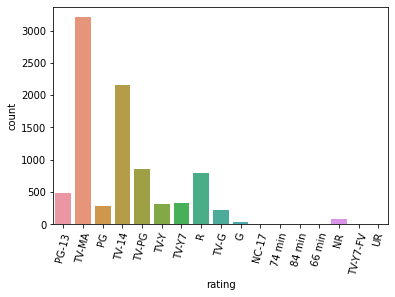

In [ ]:
sns.countplot(data = df , x = 'rating')
plt.xticks(rotation=75)
plt.show()

Above plot shows viewer rating analysis which has data=74 min, 84 min and 66 min as rating which can be considered as outliers in this data and doesn't belongs to the category of Viewer-rating

#####Missing data treatment:
1. Treatment of missing data for cast can be done by checking most-favoured cast for the country, show type and year
2. Same can be done for director
3. In case of country, it can be assumed basis the show type and where it is favoured most